<a href="https://colab.research.google.com/github/DhruvR-HWUD/DMML-Dubai-UG-Group-2/blob/Razin-Branch/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [5]:
d_url = "https://raw.githubusercontent.com/DhruvR-HWUD/DMML-Dubai-UG-Group-2/refs/heads/Razin-Branch/Datasets/processed/tabular_data/brain_tumor_dataset.csv"
target_col = "Histology"

df = pd.read_csv(d_url)
X = df.drop(columns=[target_col]).select_dtypes(include=[np.number]).values
le = LabelEncoder()
y = le.fit_transform(df[target_col].values)

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Accuracy:  0.258
F1-macro:  0.235
F1-micro:  0.258

Classification Report:
                  precision    recall  f1-score   support

    Astrocytoma       0.26      0.08      0.12      1234
   Glioblastoma       0.27      0.35      0.30      1267
Medulloblastoma       0.23      0.16      0.19      1245
     Meningioma       0.27      0.44      0.33      1254

       accuracy                           0.26      5000
      macro avg       0.25      0.26      0.24      5000
   weighted avg       0.25      0.26      0.24      5000



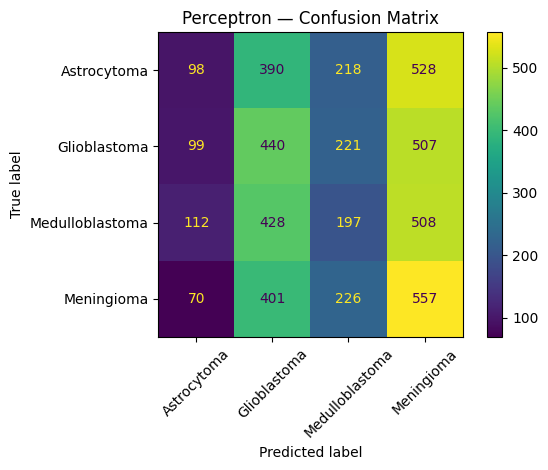

In [6]:
clf = make_pipeline(StandardScaler(), Perceptron(max_iter=2000, random_state=42))
clf.fit(X_tr, y_tr)

y_pred = clf.predict(X_te)
print(f"Accuracy:  {accuracy_score(y_te, y_pred):.3f}")
print(f"F1-macro:  {f1_score(y_te, y_pred, average='macro'):.3f}")
print(f"F1-micro:  {f1_score(y_te, y_pred, average='micro'):.3f}")
print("\nClassification Report:\n", classification_report(y_te, y_pred, target_names=le.classes_, zero_division=0))

ConfusionMatrixDisplay.from_predictions(y_te, y_pred, display_labels=le.classes_, xticks_rotation=45)
plt.title("Perceptron — Confusion Matrix")
plt.tight_layout()
plt.show()